___
<a href='http://www.kgptalkie.com'><img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>KGPTalkie YouTube</a> </em></center>

## Introduction to Deep Learning with Keras and TensorFlow

#### What is ANN?

Artificial Neural Networks (ANN) is a supervised learning system built of a large number of simple elements, called neurons or perceptrons. Each neuron can make simple decisions, and feeds those decisions to other neurons, organized in interconnected layers.

- ANN is a machine learning algorithm that is inspired by the human brain.
- ANN is a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.
- Each connection, like the synapses in a biological brain, can transmit a signal to other neurons.
- An artificial neuron that receives a signal then processes it and can signal neurons connected to it.

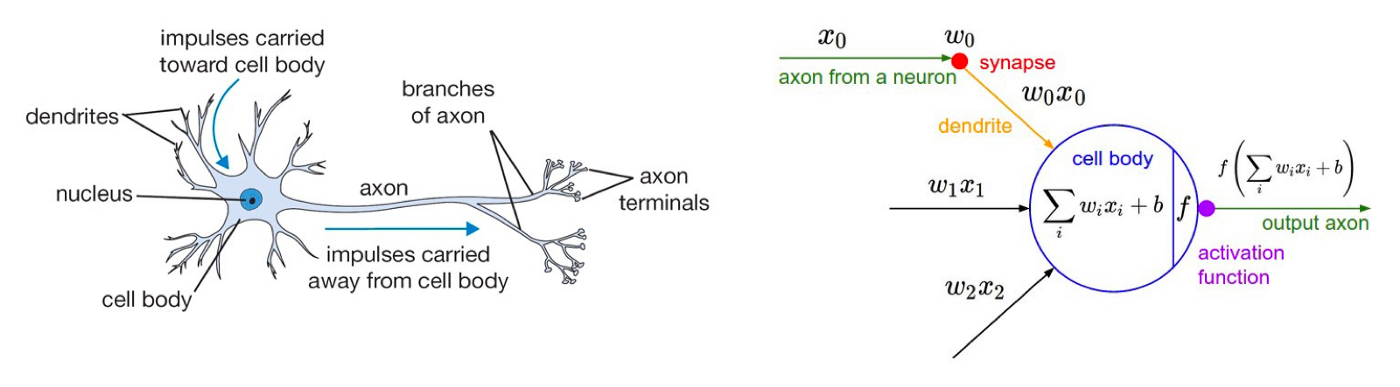

### Multi-Layer Perceptron
- A perceptron is a single layer neural network.
- Perceptron is build with LTU (Linear Threshold Unit) and it is a single layer neural network.
- LTU is a linear function of its inputs, followed by a step function. It computes a weighted sum of its inputs, and if that sum is greater than a threshold, it outputs the constant 1, otherwise it outputs 0. 
- It is a non-linear classifier, which means that it can classify data that is not linearly separable.

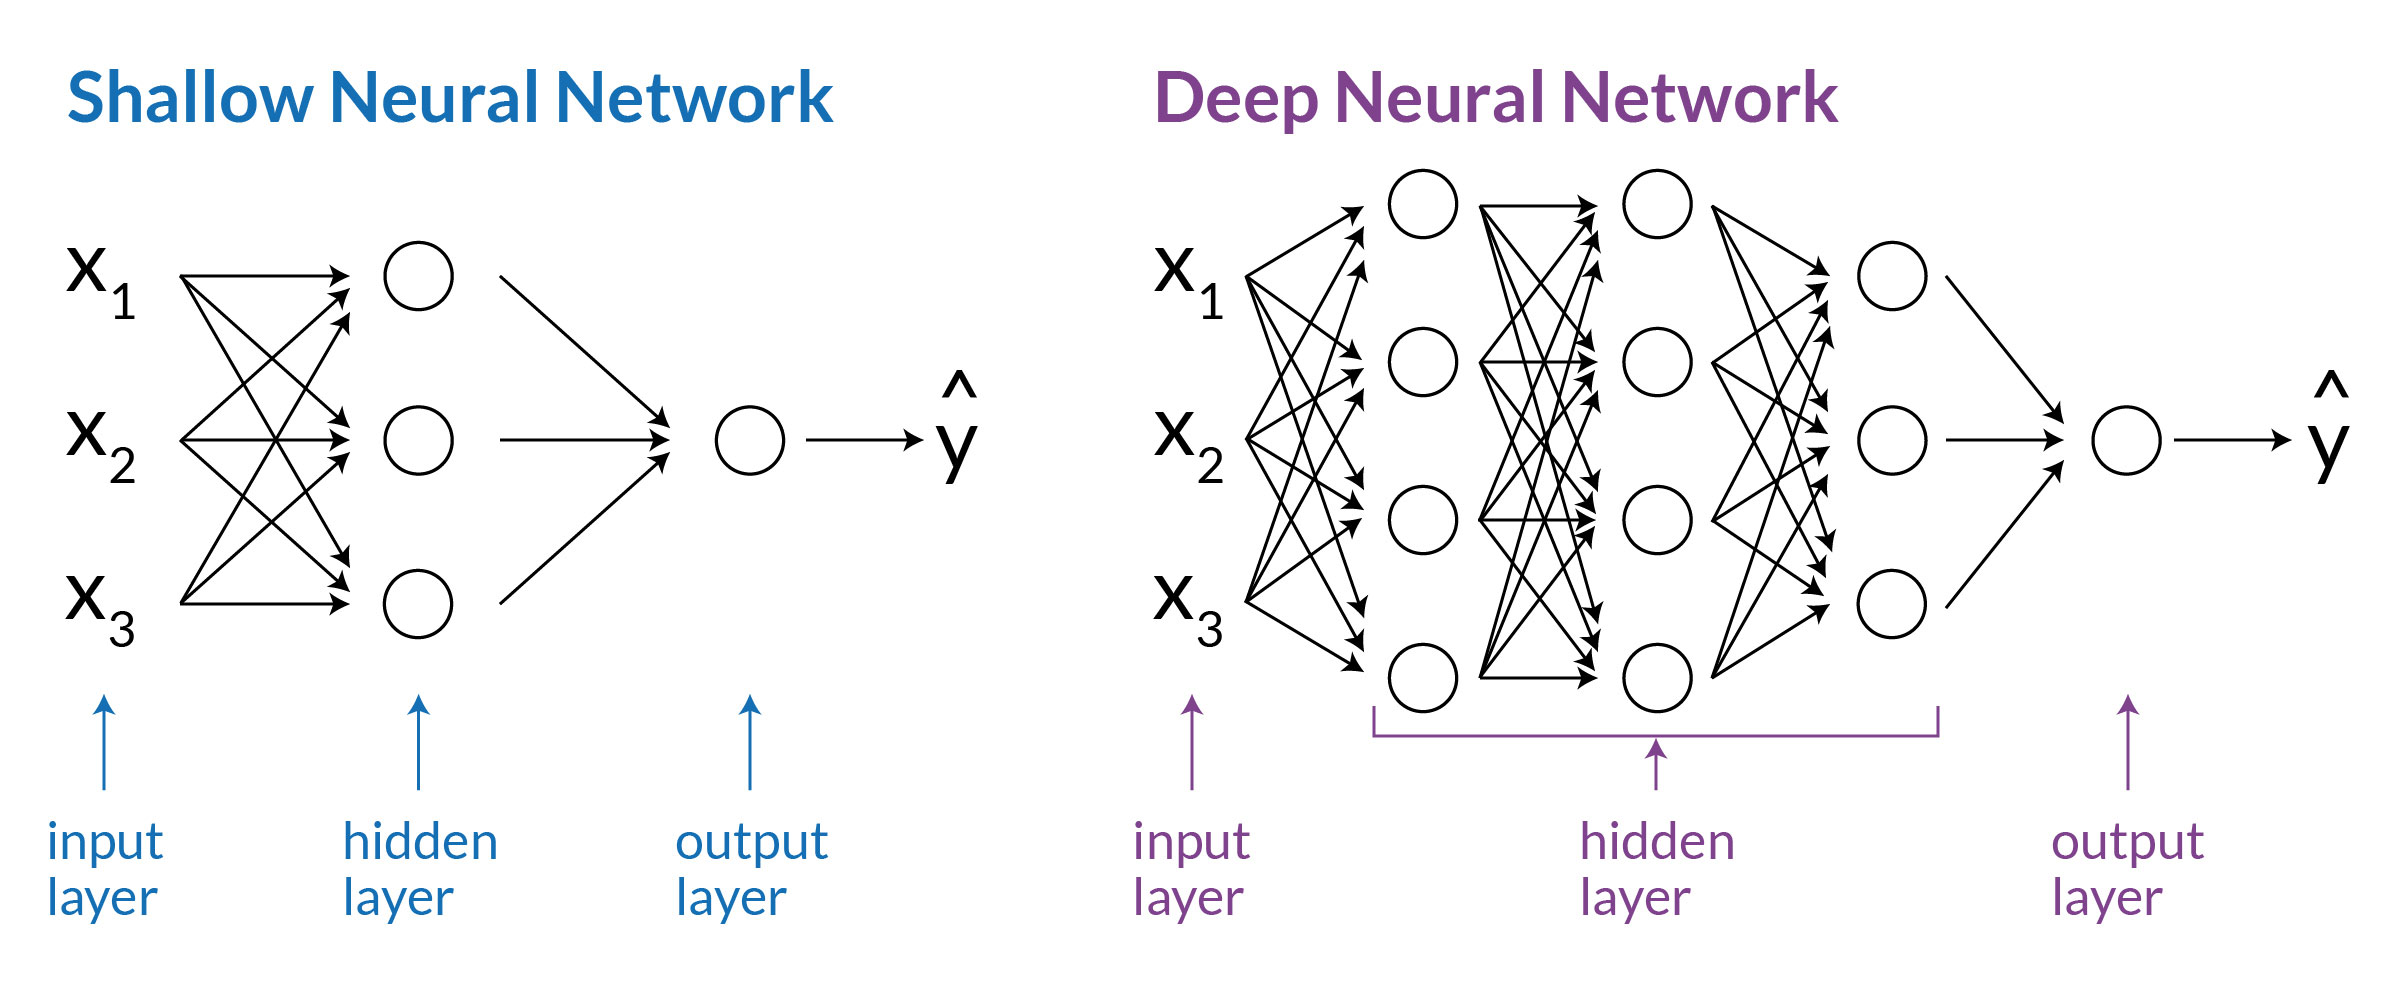

### Types of ANN
**Shallow Neural Networks**
- Shallow neural networks are neural networks with a small number of hidden layers. It has only one hidden layer.
- Pros of Shallow Neural Networks:
    - They are easy to understand and implement.
    - They are easy to train and interpret.
- Cons of Shallow Neural Networks:
    - They are not good at learning complex patterns.
    - They are not good at learning complex relationships between features.

**Deep Neural Networks**
- Deep neural networks are neural networks with a large number of hidden layers.
- Pros of Deep Neural Networks:
    - They are good at learning complex patterns.
    - They are good at learning complex relationships between features.
- Cons of Deep Neural Networks:
    - They are hard to understand and implement.
    - They are hard to train and interpret.


### What is Activation Function?

If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree.

- Sigmoid
- Tanh
- ReLu
- LeakyReLu
- SoftMax

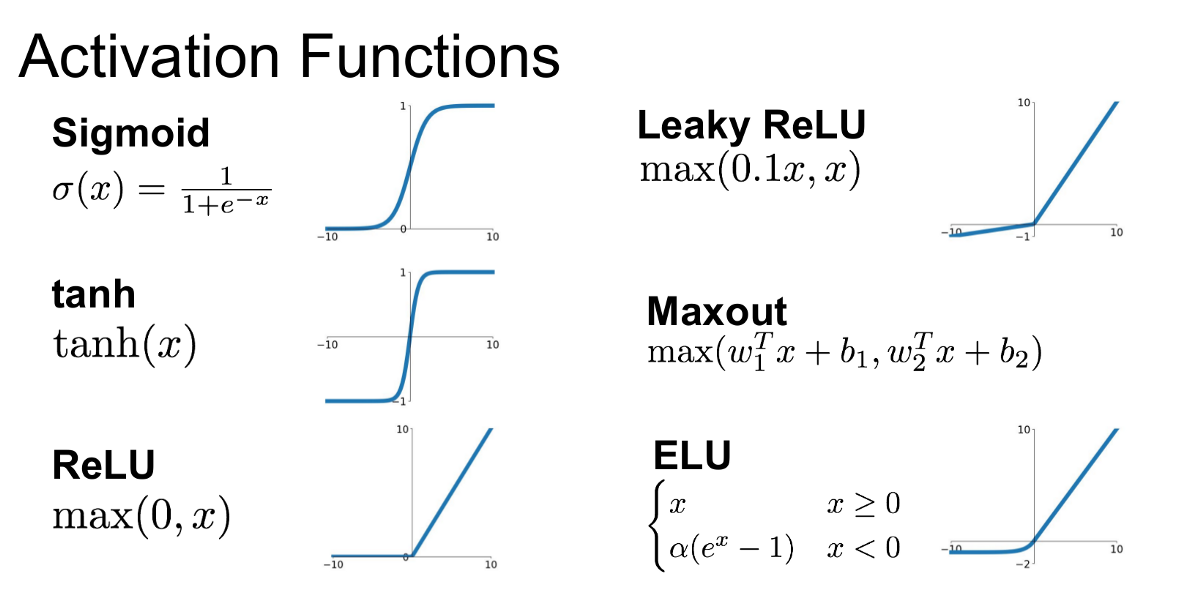

### What is Back Propagation? 

Backpropagation is a supervised learning algorithm used to train artificial neural networks, particularly feedforward neural networks. It is used to adjust the weights of the connections between the neurons in order to minimize the error between the network's output and the desired output.

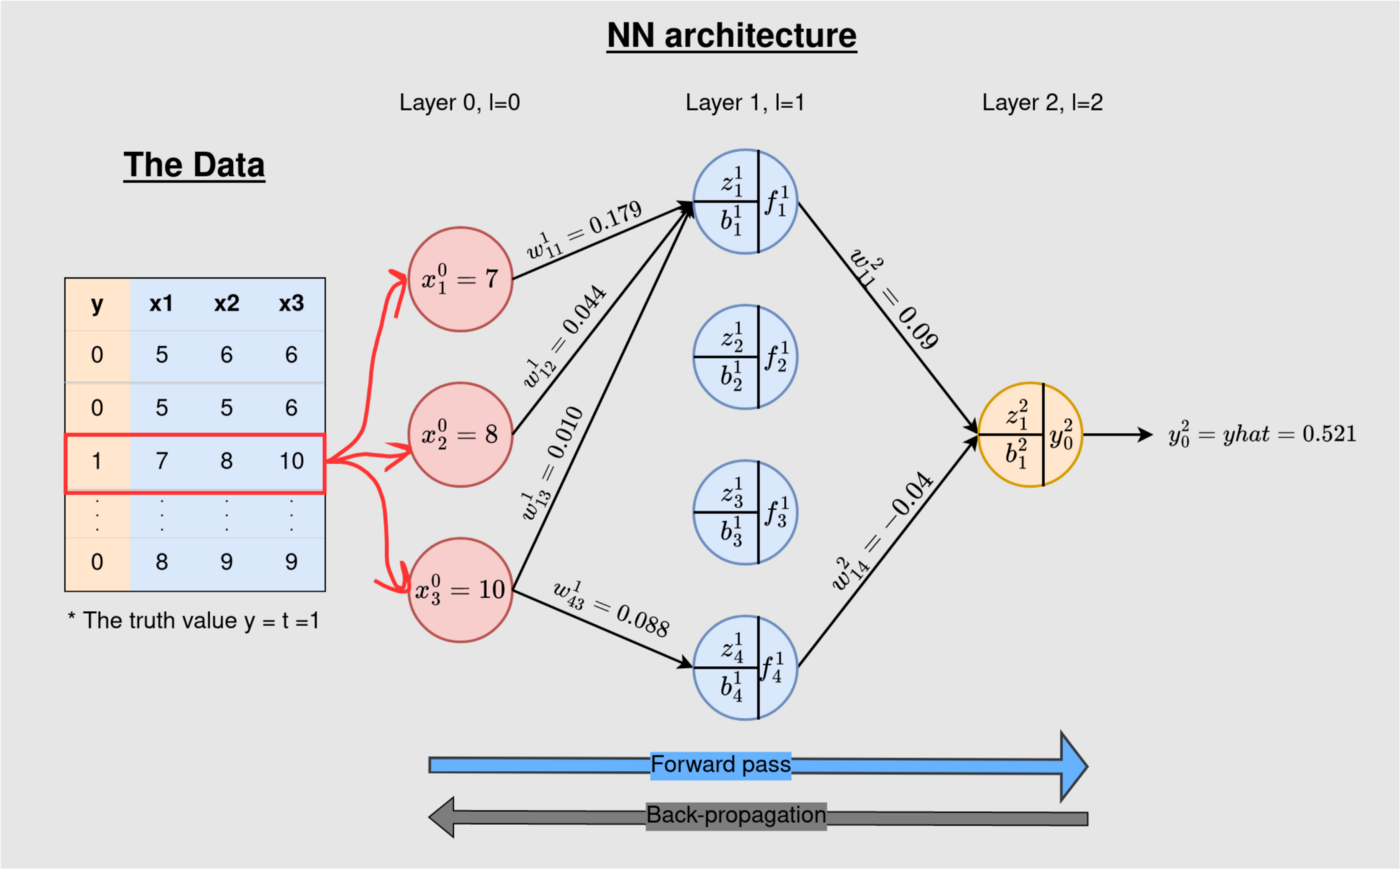

### Steps for Building First ANN with TensorFlow

TensorFlow - https://www.tensorflow.org/

Keras - https://keras.io/


- Data Preparation
- Data Preprocessing
- Add input layer
- Random weights init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- Use `model.fit` to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed

### Data Loading
https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download

In [ ]:
# https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/Customer_Churn_Modelling.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/Customer_Churn_Modelling.csv')

In [ ]:
X = dataset.iloc[:, 3:-1]
y = dataset['Exited']

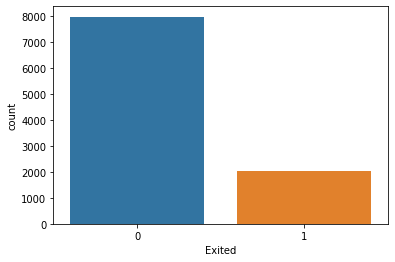

In [ ]:
sns.countplot(x=y)

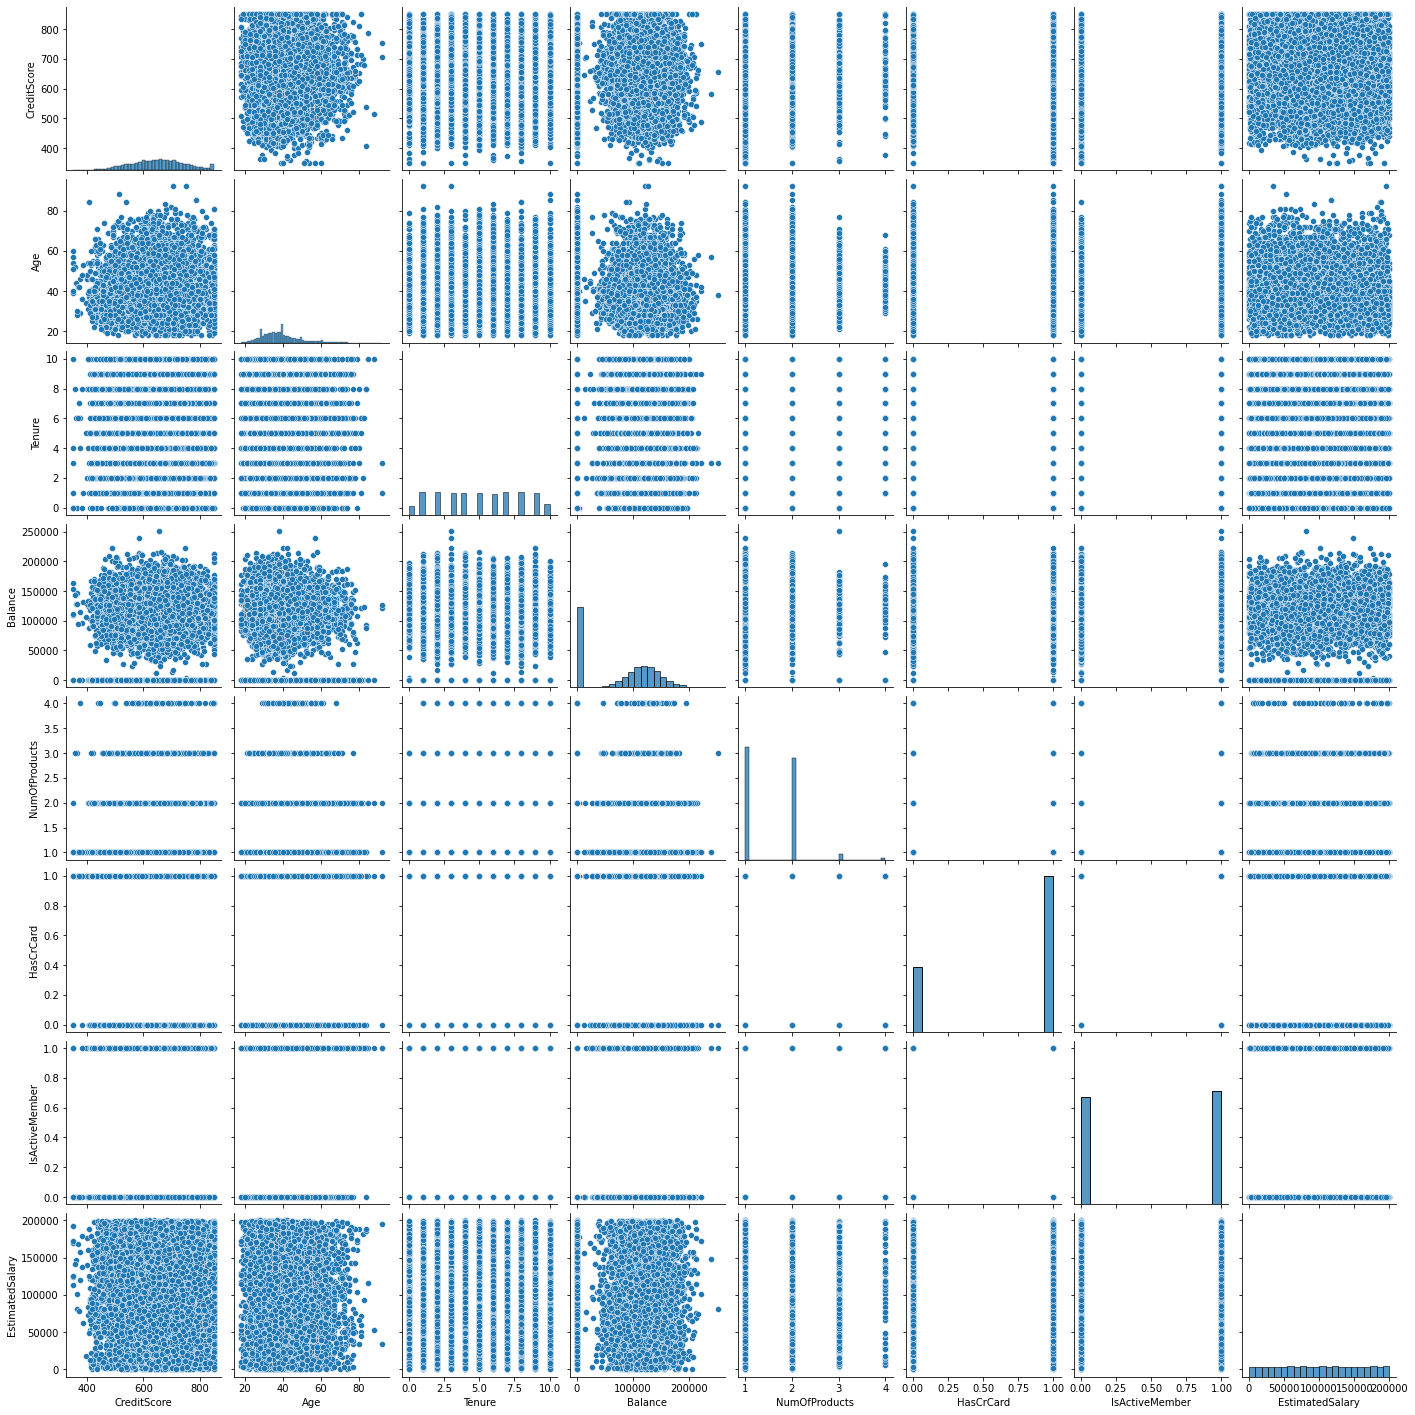

In [10]:
sns.pairplot(X)

# Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_onehot = pd.get_dummies(X, drop_first=True)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_onehot, y, test_size=0.2, stratify=y)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()
model.add(InputLayer(input_shape = X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
X_train.shape[1:]

(11,)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy')

In [24]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3545 - val_loss: 0.3614
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3416 - val_loss: 0.3709
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3347 - val_loss: 0.3650
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3308 - val_loss: 0.3655
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3266 - val_loss: 0.3618
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3249 - val_loss: 0.3594
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3208 - val_loss: 0.3660
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3184 - val_loss: 0.3670
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3162 - val_loss: 0.3636
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 0.3636

In [25]:
from sklearn.metrics import classification_report

In [26]:
y_pred = model.predict(X_test)


63/63 [==============================] - 0s 1ms/step


In [30]:
y_pred = (y_pred>0.5).astype(int)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1593
           1       0.73      0.40      0.51       407

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



In [32]:
import pickle
import os

model.save('churn_model.h5')
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [34]:
X_train[0]

array([ 0.57539992,  0.76945972,  0.34577783,  0.70341316, -0.90835043,
        0.64589732,  0.97238125,  0.71035799,  1.73147365, -0.57735027,
       -1.09665089])

In [39]:
X_onehot.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [41]:
test = [[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]

test = scaler.transform(test)

y_pred = model.predict(test)
y_pred = (y_pred>0.5).astype(int)
y_pred

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0]])

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
